In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
### load images from zipfile as dict object

zip_file = ZipFile('train.zip')
img_dict = {image_file.filename: plt.imread(zip_file.open(image_file.filename))
      for image_file in zip_file.infolist()[:20]
     }

In [3]:
### Create dataframe from dict and remove .tif from id

df_images = pd.DataFrame(img_dict.items(), columns=["id", "image"])
df_images["id"] = df_images["id"].str.replace(r'.tif$', '')

In [4]:
### Load lables in dataframe

df_lables = pd.read_csv("./train_labels.csv")

In [5]:
### Merge both dataframes based on column id

pandas_labled_images = pd.merge(df_images, df_lables, on=['id'])

In [6]:
### Safe pandas dataframe as hdf5 file. -> Warning message on first run.
### Ignore it for now. This happens becaus of different dtype columns
### Todo: Check if image quality is still the same!

pandas_labled_images.to_hdf("train.hdf", 'tarin', table=True)

/home/volkan/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:2378: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['id', 'image']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [7]:
### Read hdf5 file as dataframe

hdf_labled_images = pd.read_hdf("train.hdf")

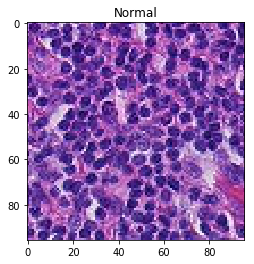

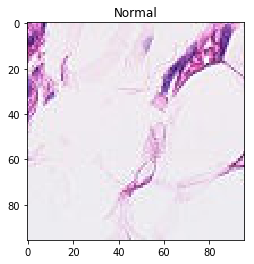

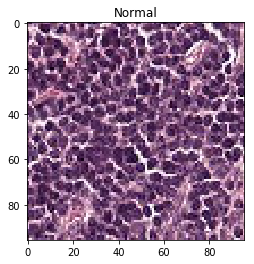

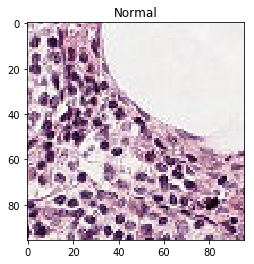

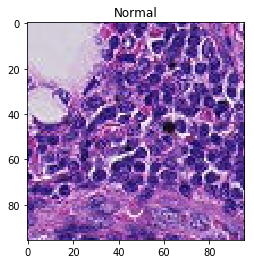

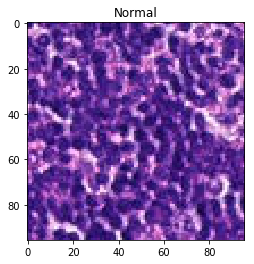

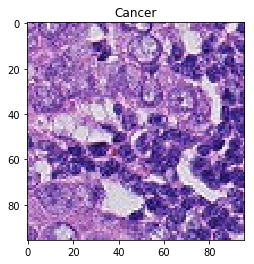

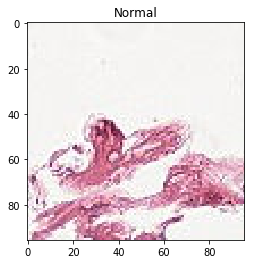

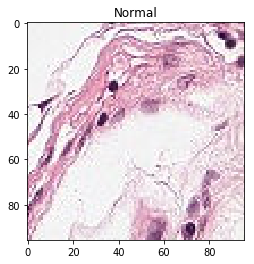

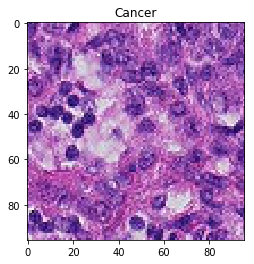

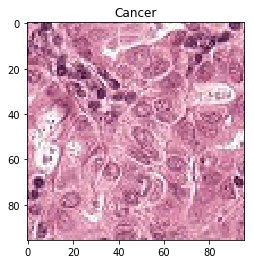

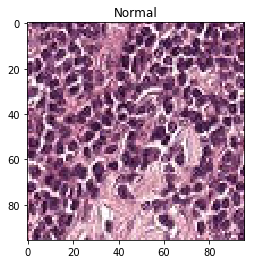

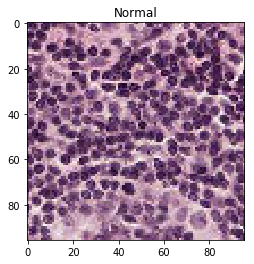

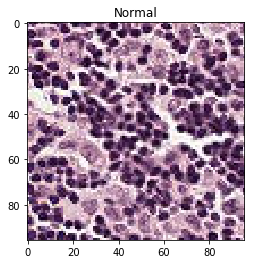

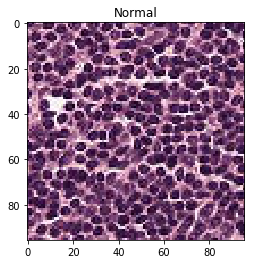

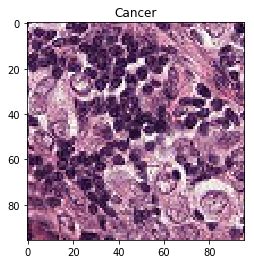

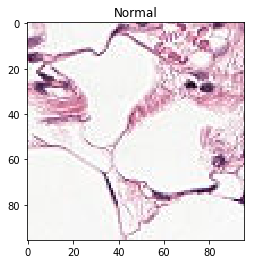

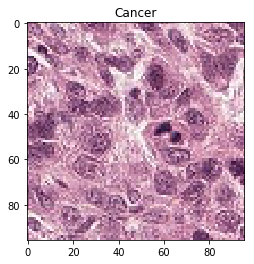

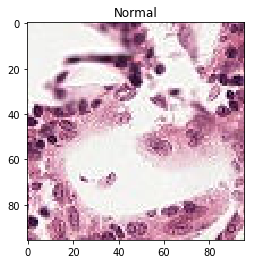

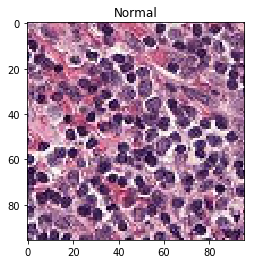

In [8]:
### Get image array from dataframe and plot it with cancer information based on lable

for row in hdf_labled_images.index:
    plt.figure()
    
    if hdf_labled_images["label"][row] == 1:
        cancer_status = "Cancer"
    else:
        cancer_status = "Normal"
        
    plt.title(cancer_status)
    plt.imshow(hdf_labled_images["image"][row])